In [5]:
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import segyio

filename = '../data/SEISMIC/MYS20104DM2/MYS20104DM2_FILT_SCAL_DEPTH_MIGR_in_depth_base.sgy'

In [6]:
def parse_trace_headers(segyfile, n_traces):
    '''
    Parse the segy file trace headers into a pandas dataframe.
    Column names are defined from segyio internal tracefield
    One row per trace
    '''
    # Get all header keys
    headers = segyio.tracefield.keys
    # Initialize dataframe with trace id as index and headers as columns
    df = pd.DataFrame(index=range(1, n_traces + 1),
                      columns=headers.keys())
    # Fill dataframe with all header values
    for k, v in headers.items():
        df[k] = segyfile.attributes(v)[:]
    return df


def parse_text_header(segyfile):
    '''
    Format segy text header into a readable, clean dict
    '''
    raw_header = segyio.tools.wrap(segyfile.text[0])
    # Cut on C*int pattern
    cut_header = re.split(r'C ', raw_header)[1::]
    # Remove end of line return
    text_header = [x.replace('\n', ' ') for x in cut_header]
    text_header[-1] = text_header[-1][:-2]
    # Format in dict
    clean_header = {}
    i = 1
    for item in text_header:
        key = "C" + str(i).rjust(2, '0')
        i += 1
        clean_header[key] = item
    return clean_header

In [7]:
with segyio.open(filename, ignore_geometry=True) as f:
    # Get basic attributes
    n_traces = f.tracecount
    sample_rate = segyio.tools.dt(f) / 1000
    n_samples = f.samples.size
    twt = f.samples
    data = f.trace.raw[:]  # Get all data into memory (could cause on big files)
    # Load headers
    bin_headers = f.bin
    text_headers = parse_text_header(f)
    trace_headers = parse_trace_headers(f, n_traces)
f'N Traces: {n_traces}, N Samples: {n_samples}, Sample rate: {sample_rate}ms'

'N Traces: 7920000, N Samples: 3334, Sample rate: 3.0ms'

In [8]:
bin_headers


{JobID: 1, LineNumber: 1, ReelNumber: 1, Traces: 1, AuxTraces: 0, Interval: 3000, IntervalOriginal: 0, Samples: 3334, SamplesOriginal: 0, Format: 1, EnsembleFold: 1, SortingCode: 4, VerticalSum: 1, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, Sweep: 0, SweepChannel: 0, SweepTaperStart: 0, SweepTaperEnd: 0, Taper: 0, CorrelatedTraces: 0, BinaryGainRecovery: 0, AmplitudeRecovery: 0, MeasurementSystem: 1, ImpulseSignalPolarity: 1, VibratoryPolarity: 0, SEGYRevision: 0, TraceFlag: 0, ExtendedHeaders: 0}

In [9]:
text_headers


{'C01': '3D PSDM(SAME     C28 MODEL AS 3D APSDM ROUTE,APER:5KM,DIP:90),DEPTH-TIME CONVERT(SMOOTH MODEL)   C29 HDVA(50M X 50M),POST MIG RADON,MUTE 3-35DEG(LIMIT 3 TRC),STACK,SINGLE FUN',
 'C02': ' C30 SCALAR,MEDIAN GAIN,TIME VARIANT FILTER,GUN & CABLE STATIC,TIME-DEPTH CONVERTC31 (WOBBLE FIX SMOOTH MODEL),SEG Y CONVERSION 32 BIT FLOATING POINT,OUTPUT     C32 MEDIA TAPE: 3590E (20GB),POLARITY:POSITIVE PEAK WITH INCREASING ACOUSTI',
 'C03': '   C33 IMPEDANCE,BIN CENTER INTERVAL FINAL(ILxXL)=6.25Mx9.375M INCREMENT(IL:XL)=1:1C34 ##### TRACE HEADER DEFINITION, BYTE LOCATION:                              C35 3D CMP   BYTE  021-024 (INT4)   STACKWORD    BYTE  033-034 (HALFWORD)       C36 TOT STATI',
 'C04': 'SR',
 'C05': 'BYTE 99-100(HALFWORD)  TOT STATI',
 'C06': 'RCV BYTE 101-102 (HALFWORD)C37 CDP-X(x100) BYTE 181-184(INT4)         CDP-Y(x100) BYTE 185-188 (INT4)      C38 INLINE BYTE 189-192 (INT4)                   XLINE BYTE 193-196 (INT4)      C39 WDM (x100) BYTE 197-200 (INT4)      DWT S

In [10]:
trace_headers.columns  # list the trace headers keys


Index(['TRACE_SEQUENCE_LINE', 'TRACE_SEQUENCE_FILE', 'FieldRecord',
       'TraceNumber', 'EnergySourcePoint', 'CDP', 'CDP_TRACE',
       'TraceIdentificationCode', 'NSummedTraces', 'NStackedTraces', 'DataUse',
       'offset', 'ReceiverGroupElevation', 'SourceSurfaceElevation',
       'SourceDepth', 'ReceiverDatumElevation', 'SourceDatumElevation',
       'SourceWaterDepth', 'GroupWaterDepth', 'ElevationScalar',
       'SourceGroupScalar', 'SourceX', 'SourceY', 'GroupX', 'GroupY',
       'CoordinateUnits', 'WeatheringVelocity', 'SubWeatheringVelocity',
       'SourceUpholeTime', 'GroupUpholeTime', 'SourceStaticCorrection',
       'GroupStaticCorrection', 'TotalStaticApplied', 'LagTimeA', 'LagTimeB',
       'DelayRecordingTime', 'MuteTimeStart', 'MuteTimeEND',
       'TRACE_SAMPLE_COUNT', 'TRACE_SAMPLE_INTERVAL', 'GainType',
       'InstrumentGainConstant', 'InstrumentInitialGain', 'Correlated',
       'SweepFrequencyStart', 'SweepFrequencyEnd', 'SweepLength', 'SweepType',
       'Swee

In [11]:
trace_headers.head()


,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2
1,1,1976,1976,1,0,2700,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1976,1976,2,0,2701,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1976,1976,3,0,2702,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1976,1976,4,0,2703,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,1976,1976,5,0,2704,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
trace_headers.loc[1, 'FieldRecord']


1976

Text(0.5, 1.0, 'Basic Header QC')

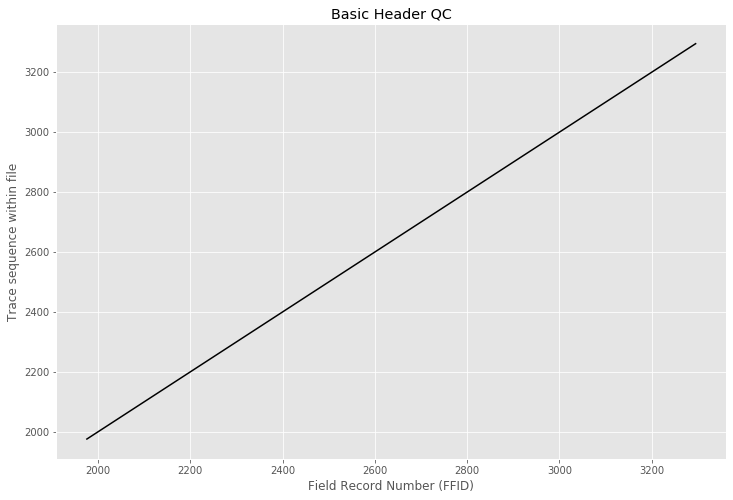

In [13]:
plt.style.use('ggplot')  # Use ggplot styles for all plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(trace_headers['FieldRecord'], trace_headers['TRACE_SEQUENCE_FILE'], '-k')
ax.set_xlabel('Field Record Number (FFID)')
ax.set_ylabel('Trace sequence within file')
ax.set_title('Basic Header QC')

In [22]:
clip_percentile = 99
vm = np.percentile(data[:100000], clip_percentile)
f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

'The 99th percentile is 4558; the max amplitude is 108593'

Text(0.5, 1.0, '../data/SEISMIC/MYS20104DM2/MYS20104DM2_FILT_SCAL_DEPTH_MIGR_in_depth_base.sgy')

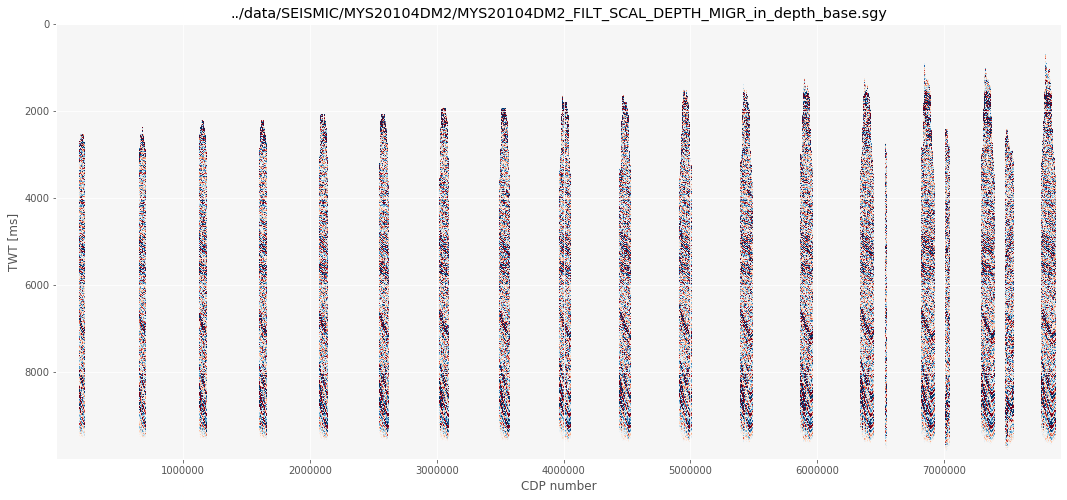

In [24]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1, 1, 1)
extent = [1, n_traces, twt[-1], twt[0]]  # define extent
ax.imshow(data[:100000].T, cmap="RdBu", vmin=-vm, vmax=vm, aspect='auto', extent=extent)
ax.set_xlabel('CDP number')
ax.set_ylabel('TWT [ms]')
ax.set_title(f'{filename}')